# Project: Wrangling and Analyze Data of "WeRateDogs"

## Data Gathering


In [1]:
#importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
import os 
import json 

In [2]:
# loading the enhanced file using pandas read
rating = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# downloading the image_prediction programatically 
data_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get (data_url)

# cheching the status code
response.status_code

200

In [4]:
#saving url to folder
with open ('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

In [5]:
#reading files
image = pd.read_csv('image-predictions.tsv', sep='\t')
rating = pd.read_csv('twitter-archive-enhanced.csv')

In [83]:
# using twitter API

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = rating.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Success")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Success
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590

Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 838083903487373313
Success
294: 837820167694528512
Success
295: 837482249356513284
Success
296: 837471256429613056
Success
297: 837366284874571778
Success
298: 837110210464448512
Success


Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success
551: 804738756058218496
Success
552: 804475857670639616
Success
553: 804413760345620481
Success
554: 804026241225523202
Success
555: 803773340896923648
Success
556: 803692223237865472
Success
557: 803638050916102144
Success
558: 803380650405482500
Success
559: 803321560782307329
Success
560: 803276597545603072
Success
561: 802952499103731712
Success
562: 802624713319034886
Success
563: 802600418706604034
Success
564: 802572683846291456
Success
565: 802323869084381190
Success
566: 802265048156610565
Success
567: 802247111496568832
Success
568: 802239329049477120
Success
569: 802185808107208704
Success
570: 801958328846974976
Success
571: 801854953262350336
Success
572: 801538201127157760
Success


Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808: 771908950375665664
Success
809: 771770456517009408
Success
810: 771500966810099713
Success
811: 771380798096281600
Success
812: 771171053431250945
Success
813: 771136648247640064
Success
814: 771102124360998913
Success
815: 771014301343748096
Success
816: 771004394259247104
Success
817: 770787852854652928
Success
818: 770772759874076672
Success
819: 770743923962707968
Success
820: 770655142660169732
Success
821: 770414278348247044
Success
822: 770293558247038976
Success
823: 770093767776997377
Success
824: 770069151037685760
Success
825: 769940425801170949
Success
826: 769695466921623552
Success
827: 769335591808995329
Success
828: 769212283578875904
Success
829: 768970937022709760
Success
830: 768909767477751808
Success


Success
1085: 738402415918125056
Success
1086: 738184450748633089
Success
1087: 738166403467907072
Success
1088: 738156290900254721
Success
1089: 737826014890496000
Success
1090: 737800304142471168
Success
1091: 737678689543020544
Success
1092: 737445876994609152
Success
1093: 737322739594330112
Success
1094: 737310737551491075
Success
1095: 736736130620620800
Success
1096: 736392552031657984
Success
1097: 736365877722001409
Success
1098: 736225175608430592
Success
1099: 736010884653420544
Success
1100: 735991953473572864
Success
1101: 735648611367784448
Success
1102: 735635087207878657
Success
1103: 735274964362878976
Success
1104: 735256018284875776
Success
1105: 735137028879360001
Success
1106: 734912297295085568
Success
1107: 734787690684657664
Success
1108: 734776360183431168
Success
1109: 734559631394082816
Success
1110: 733828123016450049
Success
1111: 733822306246479872
Success
1112: 733482008106668032
Success
1113: 733460102733135873
Success
1114: 733109485275860992
Success
11

Success
1341: 704859558691414016
Success
1342: 704847917308362754
Success
1343: 704819833553219584
Success
1344: 704761120771465216
Success
1345: 704499785726889984
Success
1346: 704491224099647488
Success
1347: 704480331685040129
Success
1348: 704364645503647744
Success
1349: 704347321748819968
Success
1350: 704134088924532736
Success
1351: 704113298707505153
Success
1352: 704054845121142784
Success
1353: 703774238772166656
Success
1354: 703769065844768768
Success
1355: 703631701117943808
Success
1356: 703611486317502464
Success
1357: 703425003149250560
Success
1358: 703407252292673536
Success
1359: 703382836347330562
Success
1360: 703356393781329922
Success
1361: 703268521220972544
Success
1362: 703079050210877440
Success
1363: 703041949650034688
Success
1364: 702932127499816960
Success
1365: 702899151802126337
Success
1366: 702684942141153280
Success
1367: 702671118226825216
Success
1368: 702598099714314240
Success
1369: 702539513671897089
Success
1370: 702332542343577600
Success
13

Success
1596: 686358356425093120
Success
1597: 686286779679375361
Success
1598: 686050296934563840
Success
1599: 686035780142297088
Success
1600: 686034024800862208
Success
1601: 686007916130873345
Success
1602: 686003207160610816
Success
1603: 685973236358713344
Success
1604: 685943807276412928
Success
1605: 685906723014619143
Success
1606: 685681090388975616
Success
1607: 685667379192414208
Success
1608: 685663452032069632
Success
1609: 685641971164143616
Success
1610: 685547936038666240
Success
1611: 685532292383666176
Success
1612: 685325112850124800
Success
1613: 685321586178670592
Success
1614: 685315239903100929
Success
1615: 685307451701334016
Success
1616: 685268753634967552
Success
1617: 685198997565345792
Success
1618: 685169283572338688
Success
1619: 684969860808454144
Success
1620: 684959798585110529
Success
1621: 684940049151070208
Success
1622: 684926975086034944
Success
1623: 684914660081053696
Success
1624: 684902183876321280
Success
1625: 684880619965411328
Success
16

Success
1867: 675349384339542016
Success
1868: 675334060156301312
Success
1869: 675166823650848770
Success
1870: 675153376133427200
Success
1871: 675149409102012420
Success
1872: 675147105808306176
Success
1873: 675146535592706048
Success
1874: 675145476954566656
Success
1875: 675135153782571009
Success
1876: 675113801096802304
Success
1877: 675111688094527488
Success
1878: 675109292475830276
Success
1879: 675047298674663426
Success
1880: 675015141583413248
Success
1881: 675006312288268288
Success
1882: 675003128568291329
Success
1883: 674999807681908736
Success
1884: 674805413498527744
Success
1885: 674800520222154752
Success
1886: 674793399141146624
Success
1887: 674790488185167872
Success
1888: 674788554665512960
Success
1889: 674781762103414784
Success
1890: 674774481756377088
Success
1891: 674767892831932416
Success
1892: 674764817387900928
Success
1893: 674754018082705410
Success
1894: 674752233200820224
Success
1895: 674743008475090944
Success
1896: 674742531037511680
Success
18

Success
2118: 670421925039075328
Success
2119: 670420569653809152
Success
2120: 670417414769758208
Success
2121: 670411370698022913
Success
2122: 670408998013820928
Success
2123: 670403879788544000
Success
2124: 670385711116361728
Success
2125: 670374371102445568
Success
2126: 670361874861563904
Success
2127: 670338931251150849
Success
2128: 670319130621435904
Success
2129: 670303360680108032
Success
2130: 670290420111441920
Success
2131: 670093938074779648
Success
2132: 670086499208155136
Success
2133: 670079681849372674
Success
2134: 670073503555706880
Success
2135: 670069087419133954
Success
2136: 670061506722140161
Success
2137: 670055038660800512
Success
2138: 670046952931721218
Success
2139: 670040295598354432
Success
2140: 670037189829525505
Success
2141: 670003130994700288
Success
2142: 669993076832759809
Success
2143: 669972011175813120
Success
2144: 669970042633789440
Success
2145: 669942763794931712
Success
2146: 669926384437997569
Success
2147: 669923323644657664
Success
21

In [8]:
with open('tweet_1.json', encoding="utf8") as f:  
      tweets = json.load(f)

In [9]:
df = pd.DataFrame(tweets)

In [10]:
tweet_json = df[['id', 'favorite_count', 'retweet_count']]

## Assessing Data



In [11]:
image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [12]:
rating

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [13]:
tweet_json

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


In [14]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
sum(tweet_json.duplicated())

0

In [16]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [17]:
sum(image.duplicated())

0

In [18]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [19]:
print(sum(rating.retweeted_status_user_id.value_counts()))

181


In [20]:
892420643555336193
image_error = rating[rating['tweet_id'] == 892420643555336193]
image_error



,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [21]:
rating.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2186,668981893510119424,NaN,NaN,2015-11-24 02:38:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unique dog here. Oddly shaped tail. Long pink ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668981893...,4,10,None,None,None,None,None
1487,693095443459342336,NaN,NaN,2016-01-29 15:36:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Milo. He doesn't understand your fancy...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693095443...,10,10,Milo,None,None,pupper,None
2345,666063827256086533,NaN,NaN,2015-11-16 01:22:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827...,10,10,the,None,None,None,None
748,779377524342161408,NaN,NaN,2016-09-23 17:50:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Have you ever seen such a smol pupper? Portabl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/779377524...,12,10,None,None,None,pupper,None
2275,667453023279554560,NaN,NaN,2015-11-19 21:22:56 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Cupcake. I would do unspeakable things fo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667453023...,11,10,Cupcake,None,None,None,None
698,786363235746385920,NaN,NaN,2016-10-13 00:29:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rizzo. He has many talents. A true ren...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/786363235...,13,10,Rizzo,doggo,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
1794,677328882937298944,NaN,NaN,2015-12-17 03:26:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Derek. All the dogs adore Derek. He's ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677328882...,10,10,Derek,None,None,None,None
1356,703425003149250560,7.030419e+17,4.196984e+09,2016-02-27 03:42:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Really guys? Again? I know this is a rare Alba...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703425003...,9,10,None,None,None,None,None
1730,679854723806179328,NaN,NaN,2015-12-24 02:42:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruce. He's a rare pup. Covered in Fro...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679854723...,7,10,Bruce,None,None,None,None


In [22]:
rating.loc[411]

tweet_id                                                     823269594223824897
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-01-22 20:42:21 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          RT @dog_rates: We only rate dogs. Please don't...
retweeted_status_id                                        822244816520155136.0
retweeted_status_user_id                                           4196983835.0
retweeted_status_timestamp                            2017-01-20 00:50:15 +0000
expanded_urls                 https://twitter.com/dog_rates/status/822244816...
rating_numerator                                                             11
rating_denominator                                                           10
name                                    

In [23]:
rating.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [24]:
#wrong naming
with pd.option_context('max_colwidth', 250):
        display(rating[rating['name'] == 'O'],
                rating[rating['name'] == 'unacceptable'],
                rating[rating['name'] == 'all'],
                rating[rating['name'] == 'Rueben'],
                rating[rating['name'] == 'life'],
                rating[rating['name'] == 'by'],
                rating[rating['name'] == 'actually'])

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521193218049/photo/1,10,10,O,None,None,None,None


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1121,730924654643314689,NaN,NaN,2016-05-13 00:56:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Pls stop sending non-canines like this Bulgarian Eyeless Porch Bear. This is unacceptable... 9/10 https://t.co/2yctWAUZ3Z,NaN,NaN,NaN,https://twitter.com/dog_rates/status/730924654643314689/photo/1,9,10,unacceptable,None,None,None,None


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1138,728035342121635841,NaN,NaN,2016-05-05 01:35:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is all I want in my life. 12/10 for super sleepy pupper https://t.co/4RlLA5ObMh,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/728035342121635841/photo/1,https://twitter.com/dog_rates/status/728035342121635841/photo/1",12,10,all,None,None,pupper,None


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1139,728015554473250816,NaN,NaN,2016-05-05 00:16:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Rueben. He has reached ultimate pupper zen state. 11/10 tranquil af https://t.co/Z167HgtnBi,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728015554473250816/photo/1,11,10,Rueben,None,None,pupper,None


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1916,674307341513269249,NaN,NaN,2015-12-08 19:19:32 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is life-changing. 12/10 https://t.co/SroTpI6psB,NaN,NaN,NaN,https://vine.co/v/i7nWzrenw5h,12,10,life,None,None,None,None


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1724,680085611152338944,NaN,NaN,2015-12-24 18:00:19 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is by far the most coordinated series of pictures I was sent. Downright impressive in every way. 12/10 for all https://t.co/etzLo3sdZE,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/680085611152338944/photo/1,https://twitter.com/dog_rates/status/680085611152338944/photo/1,https://twitter.com/dog_rates/status/680085611152338944/photo/1",12,10,by,None,None,None,None


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1040,744223424764059648,NaN,NaN,2016-06-18 17:41:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is actually a pupper and I'd pet it so well. 12/10\nhttps://t.co/RNqS7C4Y4N,NaN,NaN,NaN,https://twitter.com/strange_animals/status/672108316018024452,12,10,actually,None,None,pupper,None
1693,681297372102656000,NaN,NaN,2015-12-28 02:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is actually a lion. We only rate dogs. For the last time please only send dogs. Thank u.\n12/10 would still pet https://t.co/Pp26dMQxap,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681297372102656000/photo/1,12,10,actually,None,None,None,None


In [25]:
with pd.option_context('max_colwidth', 250):
    display(rating[rating['name'] == 'O'])

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521193218049/photo/1,10,10,O,None,None,None,None


In [26]:
#some comment which shows that some id uploaded image different from dog
print(rating['text'][1259])
print(rating['text'][411])

We 👏🏻 only 👏🏻 rate 👏🏻 dogs. Pls stop sending in non-canines like this Dutch Panda Worm. This is infuriating. 11/10 https://t.co/odfLzBonG2
RT @dog_rates: We only rate dogs. Please don't send pics of men capturing low level clouds. Thank you... 11/10 https://t.co/rLi83ZyCL5


In [27]:

image_error = image[image['tweet_id'] == 823269594223824897]
ing = image.query('tweet_id == 823269594223824897')
ing

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1746,823269594223824897,https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg,1,Samoyed,0.585441,True,Pomeranian,0.193654,True,Arctic_fox,0.071648,False


In [28]:
rating.loc[45]

tweet_id                                                     883482846933004288
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-07-08 00:28:19 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Bella. She hopes her smile made you sm...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/883482846...
rating_numerator                                                              5
rating_denominator                                                           10
name                                    

In [29]:
with pd.option_context('max_colwidth', 250):
    display(rating[rating['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9584\465788722.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  display(rating[rating['text'].str.contains(r"(\d+\.\d*\/\d+)")]


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [30]:
rating.rating_denominator.value_counts()


10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

This reveals that some dogs rating denominator is more or less than than the normal value of 10

In [31]:
rating.rating_numerator.value_counts()


12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

This shows that there are some unusual rating, the values are too high and impossible

In [32]:
# checking for those unusually higher numerators
with pd.option_context('max_colwidth', 250):
    display((rating.loc[rating.rating_numerator == 80, 'text']) )

1254    Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
Name: text, dtype: object

In [33]:
with pd.option_context('max_colwidth', 250):
    display((rating.loc[rating.rating_numerator == 1176, 'text']) )

Series([], Name: text, dtype: object)

In [34]:
with pd.option_context('max_colwidth', 250):
    display((rating.loc[rating.rating_numerator == 420, 'text']) )

188     @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
2074       After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY
Name: text, dtype: object

In [35]:
with pd.option_context('max_colwidth', 250):
    display((rating.loc[rating.rating_numerator == 204, 'text']) )

1120    Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Name: text, dtype: object

In [36]:
with pd.option_context('max_colwidth', 250):
    display((rating.loc[rating.rating_numerator == 666, 'text']) )

189    @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
Name: text, dtype: object

In [37]:
with pd.option_context('max_colwidth', 250):
    display(rating.loc[rating.rating_numerator == 75, 'text'])

340    RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
695                This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
Name: text, dtype: object

### Quality issues


### image


1. trim un-useful column


### rating 

2. Timestamp is date not object +

3. only original rating (no retweet) with images is needed+

4. Handling duplicates

5. the values for no data should be NaN and not None

6. correcting decimal errors

7. the names of some dogs are not correct since no name can be 'a'

8. correcting wrong names

9. some text review show that some images arent dogs


### Tidiness issues
10. the dog_stage names are to be melt to form values

11. the data should be merged

## Cleaning Data

In [38]:
# Make copies of original pieces of data
image_clean = image.copy()
rating_clean = rating.copy()
tweet_json_clean = tweet_json.copy()

**1.** changing the timestamp dtype to datetime

In [39]:
# code
rating_clean['timestamp'] = pd.to_datetime(rating_clean.timestamp)

#test
rating_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

**2.** only original rating (no retweet) with images is needed, therefore detecting and removing.

In [40]:
#  code
rating_clean = rating[pd.isnull(rating_clean['retweeted_status_user_id'])]

# test
print(sum(rating_clean.retweeted_status_user_id.value_counts()))

0


In [41]:
print(list(rating_clean))

['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


In [42]:
#code
rt = rating_clean[rating_clean["text"].str.contains("RT @")] 

index = rt.index
rating_clean.drop(index=index, inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9584\704666599.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_clean.drop(index=index, inplace=True)


In [43]:
#test
rating_clean[rating_clean["text"].str.contains("RT @")] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


**3.** Triming un-useful column by dropping them.

In [44]:
# code
rating_clean = rating_clean.drop(['in_reply_to_status_id',
                                 'in_reply_to_user_id',
                                 'source',
                                 'retweeted_status_id',
                                'retweeted_status_user_id',
                                 'retweeted_status_timestamp',
                                 'expanded_urls'], 1)

#test
list(rating_clean)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9584\1742076057.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  rating_clean = rating_clean.drop(['in_reply_to_status_id',


['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

**4. (Tidiness)** Melting to dog stage names 

In [45]:
#code
rating_clean = pd.melt(rating_clean, id_vars=['tweet_id',                                        
                                                 'timestamp',
                                                 'text',
                                                'rating_numerator',
                                                'rating_denominator',
                                                'name'],
               var_name='dogs', value_name='dogs_stage')

#rating_clean = rating_clean.drop('dogs', 1)
rating_clean = rating_clean.drop('dogs', 1)



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9584\2614434397.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  rating_clean = rating_clean.drop('dogs', 1)


In [46]:
rating_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,None


In [47]:
#test
rating_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8700 entries, 0 to 8699
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            8700 non-null   int64 
 1   timestamp           8700 non-null   object
 2   text                8700 non-null   object
 3   rating_numerator    8700 non-null   int64 
 4   rating_denominator  8700 non-null   int64 
 5   name                8700 non-null   object
 6   dogs_stage          8700 non-null   object
dtypes: int64(3), object(4)
memory usage: 475.9+ KB


In [48]:
rating_clean.dogs_stage.unique()

array(['None', 'doggo', 'floofer', 'pupper', 'puppo'], dtype=object)

**5.** handling duplicates

In [49]:
#code
rating_clean = rating_clean.sort_values('dogs_stage').drop_duplicates(subset='tweet_id', 
                                                                                keep='last')
rating_clean

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage
2095,667443425659232256,2015-11-19 20:44:47 +0000,Exotic dog here. Long neck. Weird paws. Obsess...,6,10,None,None
2094,667453023279554560,2015-11-19 21:22:56 +0000,Meet Cupcake. I would do unspeakable things fo...,11,10,Cupcake,None
2093,667455448082227200,2015-11-19 21:32:34 +0000,This is Reese and Twips. Reese protects Twips....,7,10,Reese,None
2092,667470559035432960,2015-11-19 22:32:36 +0000,This is a northern Wahoo named Kohl. He runs t...,11,10,a,None
2091,667491009379606528,2015-11-19 23:53:52 +0000,Two dogs in this one. Both are rare Jujitsu Py...,7,10,None,None
...,...,...,...,...,...,...,...
7430,738537504001953792,2016-06-03 01:07:16 +0000,This is Bayley. She fell asleep trying to esca...,11,10,Bayley,puppo
7059,790946055508652032,2016-10-25 16:00:09 +0000,This is Betty. She's assisting with the dishes...,12,10,Betty,puppo
7395,743253157753532416,2016-06-16 01:25:36 +0000,This is Kilo. He cannot reach the snackum. Nif...,10,10,Kilo,puppo
7276,756275833623502848,2016-07-21 23:53:04 +0000,When ur older siblings get to play in the deep...,10,10,None,puppo


In [50]:
#code
rating_clean=rating_clean.reset_index(drop=True)

#test
rating_clean

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage
0,667443425659232256,2015-11-19 20:44:47 +0000,Exotic dog here. Long neck. Weird paws. Obsess...,6,10,None,None
1,667453023279554560,2015-11-19 21:22:56 +0000,Meet Cupcake. I would do unspeakable things fo...,11,10,Cupcake,None
2,667455448082227200,2015-11-19 21:32:34 +0000,This is Reese and Twips. Reese protects Twips....,7,10,Reese,None
3,667470559035432960,2015-11-19 22:32:36 +0000,This is a northern Wahoo named Kohl. He runs t...,11,10,a,None
4,667491009379606528,2015-11-19 23:53:52 +0000,Two dogs in this one. Both are rare Jujitsu Py...,7,10,None,None
...,...,...,...,...,...,...,...
2170,738537504001953792,2016-06-03 01:07:16 +0000,This is Bayley. She fell asleep trying to esca...,11,10,Bayley,puppo
2171,790946055508652032,2016-10-25 16:00:09 +0000,This is Betty. She's assisting with the dishes...,12,10,Betty,puppo
2172,743253157753532416,2016-06-16 01:25:36 +0000,This is Kilo. He cannot reach the snackum. Nif...,10,10,Kilo,puppo
2173,756275833623502848,2016-07-21 23:53:04 +0000,When ur older siblings get to play in the deep...,10,10,None,puppo


**6.** Substituting all None for nan

In [51]:
#code
rating_clean.replace('None', np.nan, inplace= True)

#test
rating_clean

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage
0,667443425659232256,2015-11-19 20:44:47 +0000,Exotic dog here. Long neck. Weird paws. Obsess...,6,10,NaN,NaN
1,667453023279554560,2015-11-19 21:22:56 +0000,Meet Cupcake. I would do unspeakable things fo...,11,10,Cupcake,NaN
2,667455448082227200,2015-11-19 21:32:34 +0000,This is Reese and Twips. Reese protects Twips....,7,10,Reese,NaN
3,667470559035432960,2015-11-19 22:32:36 +0000,This is a northern Wahoo named Kohl. He runs t...,11,10,a,NaN
4,667491009379606528,2015-11-19 23:53:52 +0000,Two dogs in this one. Both are rare Jujitsu Py...,7,10,NaN,NaN
...,...,...,...,...,...,...,...
2170,738537504001953792,2016-06-03 01:07:16 +0000,This is Bayley. She fell asleep trying to esca...,11,10,Bayley,puppo
2171,790946055508652032,2016-10-25 16:00:09 +0000,This is Betty. She's assisting with the dishes...,12,10,Betty,puppo
2172,743253157753532416,2016-06-16 01:25:36 +0000,This is Kilo. He cannot reach the snackum. Nif...,10,10,Kilo,puppo
2173,756275833623502848,2016-07-21 23:53:04 +0000,When ur older siblings get to play in the deep...,10,10,NaN,puppo


**7.** The datatype of rating_(numerator and denominator) should be float

In [52]:
#code
rating_clean[['rating_numerator', 'rating_denominator']] = rating_clean[['rating_numerator','rating_denominator']].astype(float)

rating_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   int64  
 1   timestamp           2175 non-null   object 
 2   text                2175 non-null   object 
 3   rating_numerator    2175 non-null   float64
 4   rating_denominator  2175 non-null   float64
 5   name                1495 non-null   object 
 6   dogs_stage          344 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 119.1+ KB


**8.** Correcting the decimal errors in numerator

In [53]:
rating_clean.loc[(rating_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
rating_clean.loc[(rating_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
rating_clean.loc[(rating_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26
rating_clean.loc[(rating_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
rating_clean.loc[(rating_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27

with pd.option_context('max_colwidth', 200):
    display(rating_clean[rating_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9584\2669197232.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  display(rating_clean[rating_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]


,tweet_id,text,rating_numerator,rating_denominator
203,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
345,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
957,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0
1246,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
1986,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0


**9.** Changing *a* inside column *name* to  their true names. This error was due to different naming modes.

In [54]:
naming_error = ['name is',  'named', 'name to']
for mode in naming_error:
    naming_mode = rating_clean[rating_clean.text.str.contains(mode)]
    let = lambda y: y.split(mode, 1)[1].split()[0].split('.,')
    rating_clean.loc[rating_clean['text'].str.contains(mode), 'name'] = naming_mode.text.apply(let)

In [55]:
rating_clean.name.value_counts()

a           35
Lucy        11
Charlie     11
Cooper      10
Oliver      10
            ..
Harrison     1
Terrance     1
Samsom       1
Jaspers      1
Betty        1
Name: name, Length: 986, dtype: int64

**10.** correcting wrong names and assigning nan or right names

In [56]:
#wrong naming
with pd.option_context('max_colwidth', 250):
        display(rating_clean[rating_clean['name'] == 'O'],
                rating_clean[rating_clean['name'] == 'unacceptable'],
                rating_clean[rating_clean['name'] == 'all'],
                rating_clean[rating_clean['name'] == 'Rueben'],
                rating_clean[rating_clean['name'] == 'life'],
                rating_clean[rating_clean['name'] == 'by'],
                rating_clean[rating_clean['name'] == 'quite'],
                rating_clean[rating_clean['name'] == 'actually'],
                rating_clean[rating_clean['name'] == 'a'])

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage
1826,776201521193218049,2016-09-14 23:30:38 +0000,This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,10.0,10.0,O,NaN


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage
1769,730924654643314689,2016-05-13 00:56:32 +0000,We only rate dogs. Pls stop sending non-canines like this Bulgarian Eyeless Porch Bear. This is unacceptable... 9/10 https://t.co/2yctWAUZ3Z,9.0,10.0,unacceptable,NaN


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage
1953,728035342121635841,2016-05-05 01:35:26 +0000,This is all I want in my life. 12/10 for super sleepy pupper https://t.co/4RlLA5ObMh,12.0,10.0,all,pupper


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage
1952,728015554473250816,2016-05-05 00:16:48 +0000,This is Rueben. He has reached ultimate pupper zen state. 11/10 tranquil af https://t.co/Z167HgtnBi,11.0,10.0,Rueben,pupper


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage
1011,674307341513269249,2015-12-08 19:19:32 +0000,This is life-changing. 12/10 https://t.co/SroTpI6psB,12.0,10.0,life,NaN


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage
973,680085611152338944,2015-12-24 18:00:19 +0000,This is by far the most coordinated series of pictures I was sent. Downright impressive in every way. 12/10 for all https://t.co/etzLo3sdZE,12.0,10.0,by,NaN


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage
109,666411507551481857,2015-11-17 00:24:19 +0000,This is quite the dog. Gets really excited when not in water. Not very soft tho. Bad at fetch. Can't do tricks. 2/10 https://t.co/aMCTNWO94t,2.0,10.0,quite,NaN
1353,855459453768019968,2017-04-21 16:33:22 +0000,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",12.0,10.0,quite,NaN
1429,859196978902773760,2017-05-02 00:04:57 +0000,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,12.0,10.0,quite,NaN


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage
646,681297372102656000,2015-12-28 02:15:26 +0000,This is actually a lion. We only rate dogs. For the last time please only send dogs. Thank u.\n12/10 would still pet https://t.co/Pp26dMQxap,12.0,10.0,actually,NaN
1941,744223424764059648,2016-06-18 17:41:06 +0000,This is actually a pupper and I'd pet it so well. 12/10\nhttps://t.co/RNqS7C4Y4N,12.0,10.0,actually,pupper


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage
85,668466899341221888,2015-11-22 16:31:42 +0000,Here is a mother dog caring for her pups. Snazzy red mohawk. Doesn't wag tail. Pups look confused. Overall 4/10 https://t.co/YOHe6lf09m,4.0,10.0,a,NaN
101,666293911632134144,2015-11-16 16:37:02 +0000,This is a funny dog. Weird toes. Won't come down. Loves branch. Refuses to eat his food. Hard to cuddle with. 3/10 https://t.co/IIXis0zta0,3.0,10.0,a,NaN
108,666407126856765440,2015-11-17 00:06:54 +0000,This is a southern Vesuvius bumblegruff. Can drive a truck (wow). Made friends with 5 other nifty dogs (neat). 7/10 https://t.co/LopTBkKa8h,7.0,10.0,a,NaN
123,666057090499244032,2015-11-16 00:55:59 +0000,My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O,9.0,10.0,a,NaN
124,666055525042405380,2015-11-16 00:49:46 +0000,Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt,10.0,10.0,a,NaN
126,666050758794694657,2015-11-16 00:30:50 +0000,This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,10.0,10.0,a,NaN
128,666044226329800704,2015-11-16 00:04:52 +0000,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,6.0,10.0,a,NaN
129,666033412701032449,2015-11-15 23:21:54 +0000,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,9.0,10.0,a,NaN
130,666029285002620928,2015-11-15 23:05:30 +0000,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,7.0,10.0,a,NaN
235,692187005137076224,2016-01-27 03:26:56 +0000,This is a rare Arctic Wubberfloof. Unamused by the happenings. No longer has the appetites. 12/10 would totally hug https://t.co/krvbacIX0N,12.0,10.0,a,NaN


In [57]:
rating_clean.name.replace('O', np.nan, inplace= True)
rating_clean.name.replace('unacceptable', np.nan, inplace= True)
rating_clean.name.replace('all', np.nan, inplace= True)
rating_clean.name.replace('life', np.nan, inplace= True)
rating_clean.name.replace('by', np.nan, inplace= True)
rating_clean.name.replace('actually', np.nan, inplace= True)
rating_clean.name.replace('quite', np.nan, inplace= True)
rating_clean.name.replace('a', np.nan, inplace= True)

In [58]:
print(rating_clean.loc[1826])
print(rating_clean.loc[1769])
print(rating_clean.loc[1953])
print(rating_clean.loc[1952])
print(rating_clean.loc[1011])
print(rating_clean.loc[973])
print(rating_clean.loc[646])
print(rating_clean.loc[1941])
print(rating_clean.loc[109])
print(rating_clean.loc[1353])
print(rating_clean.loc[1429])

tweet_id                                             776201521193218049
timestamp                                     2016-09-14 23:30:38 +0000
text                  This is O'Malley. That is how he sleeps. Doesn...
rating_numerator                                                   10.0
rating_denominator                                                 10.0
name                                                                NaN
dogs_stage                                                          NaN
Name: 1826, dtype: object
tweet_id                                             730924654643314689
timestamp                                     2016-05-13 00:56:32 +0000
text                  We only rate dogs. Pls stop sending non-canine...
rating_numerator                                                    9.0
rating_denominator                                                 10.0
name                                                                NaN
dogs_stage                            

In [59]:
#Correcing name
rating_clean.name.replace('Rueben', 'Reuben', inplace= True)

**11.** Dropping rows that are not dog.

In [60]:
rating_clean_out = rating_clean.drop(index=[505,662,975,1353,1605,1612])

In [61]:
rating_clean_out

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage
0,667443425659232256,2015-11-19 20:44:47 +0000,Exotic dog here. Long neck. Weird paws. Obsess...,6.0,10.0,NaN,NaN
1,667453023279554560,2015-11-19 21:22:56 +0000,Meet Cupcake. I would do unspeakable things fo...,11.0,10.0,Cupcake,NaN
2,667455448082227200,2015-11-19 21:32:34 +0000,This is Reese and Twips. Reese protects Twips....,7.0,10.0,Reese,NaN
3,667470559035432960,2015-11-19 22:32:36 +0000,This is a northern Wahoo named Kohl. He runs t...,11.0,10.0,[Kohl.],NaN
4,667491009379606528,2015-11-19 23:53:52 +0000,Two dogs in this one. Both are rare Jujitsu Py...,7.0,10.0,NaN,NaN
...,...,...,...,...,...,...,...
2170,738537504001953792,2016-06-03 01:07:16 +0000,This is Bayley. She fell asleep trying to esca...,11.0,10.0,Bayley,puppo
2171,790946055508652032,2016-10-25 16:00:09 +0000,This is Betty. She's assisting with the dishes...,12.0,10.0,Betty,puppo
2172,743253157753532416,2016-06-16 01:25:36 +0000,This is Kilo. He cannot reach the snackum. Nif...,10.0,10.0,Kilo,puppo
2173,756275833623502848,2016-07-21 23:53:04 +0000,When ur older siblings get to play in the deep...,10.0,10.0,NaN,puppo


In [62]:
rating_clean_out.name.value_counts()

Lucy        11
Charlie     11
Cooper      10
Oliver      10
Penny        9
            ..
Chaz         1
Harrison     1
Terrance     1
Samsom       1
Betty        1
Name: name, Length: 977, dtype: int64

**12.** **Tidiness** merging rating to image

In [63]:
rating_join = pd.merge(rating_clean_out, image_clean,
                      how = 'left', on = ['tweet_id'])
rating_join = rating_join[rating_join['jpg_url'].notnull()]

In [64]:
rating_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1988 entries, 0 to 2168
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1988 non-null   int64  
 1   timestamp           1988 non-null   object 
 2   text                1988 non-null   object 
 3   rating_numerator    1988 non-null   float64
 4   rating_denominator  1988 non-null   float64
 5   name                1411 non-null   object 
 6   dogs_stage          306 non-null    object 
 7   jpg_url             1988 non-null   object 
 8   img_num             1988 non-null   float64
 9   p1                  1988 non-null   object 
 10  p1_conf             1988 non-null   float64
 11  p1_dog              1988 non-null   object 
 12  p2                  1988 non-null   object 
 13  p2_conf             1988 non-null   float64
 14  p2_dog              1988 non-null   object 
 15  p3                  1988 non-null   object 
 16  p3_con

**13.** **Tidiness** Join  rating_join to tweet_json_clean

In [65]:
image_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [66]:
tweet_json_clean.rename(columns = {'id': 'tweet_id'}, inplace = True)

In [67]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [68]:
rating_final = pd.merge(rating_join, tweet_json_clean,
                       how = 'left', on= ['tweet_id'])
rating_final

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,667443425659232256,2015-11-19 20:44:47 +0000,Exotic dog here. Long neck. Weird paws. Obsess...,6.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,1.0,goose,0.980815,False,drake,0.006918,False,hen,0.005255,False,833,620
1,667453023279554560,2015-11-19 21:22:56 +0000,Meet Cupcake. I would do unspeakable things fo...,11.0,10.0,Cupcake,NaN,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,1.0,Labrador_retriever,0.825670,True,French_bulldog,0.056639,True,Staffordshire_bullterrier,0.054018,True,327,96
2,667455448082227200,2015-11-19 21:32:34 +0000,This is Reese and Twips. Reese protects Twips....,7.0,10.0,Reese,NaN,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,1.0,Tibetan_terrier,0.676376,True,Irish_terrier,0.054933,True,Yorkshire_terrier,0.040576,True,203,66
3,667470559035432960,2015-11-19 22:32:36 +0000,This is a northern Wahoo named Kohl. He runs t...,11.0,10.0,[Kohl.],NaN,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,1.0,toy_poodle,0.304175,True,pug,0.223427,True,Lakeland_terrier,0.073316,True,273,102
4,667491009379606528,2015-11-19 23:53:52 +0000,Two dogs in this one. Both are rare Jujitsu Py...,7.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,1.0,borzoi,0.852088,True,ice_bear,0.132264,False,weasel,0.005730,False,559,242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,738537504001953792,2016-06-03 01:07:16 +0000,This is Bayley. She fell asleep trying to esca...,11.0,10.0,Bayley,puppo,https://pbs.twimg.com/media/Cj_P7rSUgAAYQbz.jpg,1.0,chow,0.808737,True,gibbon,0.028942,False,Pembroke,0.026498,True,5575,1759
1984,790946055508652032,2016-10-25 16:00:09 +0000,This is Betty. She's assisting with the dishes...,12.0,10.0,Betty,puppo,https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg,1.0,dishwasher,0.700466,False,golden_retriever,0.245773,True,chow,0.039012,True,18601,5496
1985,743253157753532416,2016-06-16 01:25:36 +0000,This is Kilo. He cannot reach the snackum. Nif...,10.0,10.0,Kilo,puppo,https://pbs.twimg.com/media/ClCQzFUUYAA5vAu.jpg,1.0,malamute,0.442612,True,Siberian_husky,0.368137,True,Eskimo_dog,0.177822,True,4624,1366
1986,756275833623502848,2016-07-21 23:53:04 +0000,When ur older siblings get to play in the deep...,10.0,10.0,NaN,puppo,https://pbs.twimg.com/media/Cn7U2xlW8AI9Pqp.jpg,1.0,Airedale,0.602957,True,Irish_terrier,0.086981,True,bloodhound,0.086276,True,7114,1738


In [69]:
rating_final.loc[rating_final['rating_numerator'] > 10, 'dogs_stage']

1         NaN
3         NaN
6         NaN
7         NaN
9         NaN
        ...  
1981    puppo
1982    puppo
1983    puppo
1984    puppo
1987    puppo
Name: dogs_stage, Length: 1159, dtype: object

In [70]:
rating_final.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,667443425659232256,2015-11-19 20:44:47 +0000,Exotic dog here. Long neck. Weird paws. Obsess...,6.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,1.0,goose,0.980815,False,drake,0.006918,False,hen,0.005255,False,833,620
1,667453023279554560,2015-11-19 21:22:56 +0000,Meet Cupcake. I would do unspeakable things fo...,11.0,10.0,Cupcake,NaN,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,1.0,Labrador_retriever,0.825670,True,French_bulldog,0.056639,True,Staffordshire_bullterrier,0.054018,True,327,96
2,667455448082227200,2015-11-19 21:32:34 +0000,This is Reese and Twips. Reese protects Twips....,7.0,10.0,Reese,NaN,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,1.0,Tibetan_terrier,0.676376,True,Irish_terrier,0.054933,True,Yorkshire_terrier,0.040576,True,203,66
3,667470559035432960,2015-11-19 22:32:36 +0000,This is a northern Wahoo named Kohl. He runs t...,11.0,10.0,[Kohl.],NaN,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,1.0,toy_poodle,0.304175,True,pug,0.223427,True,Lakeland_terrier,0.073316,True,273,102
4,667491009379606528,2015-11-19 23:53:52 +0000,Two dogs in this one. Both are rare Jujitsu Py...,7.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,1.0,borzoi,0.852088,True,ice_bear,0.132264,False,weasel,0.005730,False,559,242


In [71]:
rating_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1988 entries, 0 to 1987
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1988 non-null   int64  
 1   timestamp           1988 non-null   object 
 2   text                1988 non-null   object 
 3   rating_numerator    1988 non-null   float64
 4   rating_denominator  1988 non-null   float64
 5   name                1411 non-null   object 
 6   dogs_stage          306 non-null    object 
 7   jpg_url             1988 non-null   object 
 8   img_num             1988 non-null   float64
 9   p1                  1988 non-null   object 
 10  p1_conf             1988 non-null   float64
 11  p1_dog              1988 non-null   object 
 12  p2                  1988 non-null   object 
 13  p2_conf             1988 non-null   float64
 14  p2_dog              1988 non-null   object 
 15  p3                  1988 non-null   object 
 16  p3_con

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [82]:
rating_final.to_csv('twitter_achieve_master', index = False, encoding = 'utf8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

**Insight one**
Examining the dog_stage in the image prediction, pupper stage has the highest number

In [73]:
#creating a list
dog_type = []

#appending the three p column 
def species(image_clean):
    if image_clean['p1_dog'] == True:
        dog_type.append(image_clean['p1'])
    elif image_clean['p2_dog'] == True:
        dog_type.append(image_clean['p2'])
    elif image_clean['p3_dog'] == True:
        dog_type.append(image_clean['p3'])

    else: dog_type.append('Error')
        
 #giving it a name
image_clean.apply(species, axis=1)
image_clean['dog_type'] = dog_type

In [74]:
image_clean.dog_type.value_counts()

Error                   324
golden_retriever        173
Labrador_retriever      113
Pembroke                 96
Chihuahua                95
                       ... 
Scotch_terrier            1
EntleBucher               1
Japanese_spaniel          1
standard_schnauzer        1
Bouvier_des_Flandres      1
Name: dog_type, Length: 114, dtype: int64

The first insight has shown to us that out of all the dogs posted, the image predictor detected more of this dog breed/species to be golden_retriever with a count of 173.   

**Insight Two.** While considering the dog prediction breeds, golden retreiver is the no.1

In [75]:
rating_final.dogs_stage.value_counts()

pupper     212
doggo       63
puppo       23
floofer      8
Name: dogs_stage, dtype: int64

Among all the dogs posted, pupper has the highest number. Pupper is the stage of a dog close to doggo.

**Insight Three.** puppo has the highest rating average

In [76]:
rating_final.groupby(['dogs_stage'])['rating_numerator'].mean().sort_values()

dogs_stage
pupper     10.652217
floofer    11.875000
doggo      11.888889
puppo      12.043478
Name: rating_numerator, dtype: float64

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


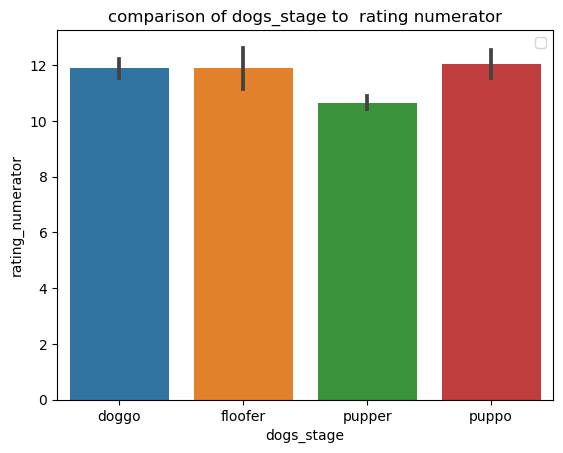

In [77]:
sns.barplot('dogs_stage', 'rating_numerator', data = rating_final)
plt.title('comparison of dogs_stage to  rating numerator')
plt.legend();

### Insights:
1. Golden_retreiver has the highest prediction number

2. Pupper has the number of dogs posted under the dog stage

3. comparing dogs_stage to the number of rating average, puppo leads on a 12

## Visualization

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


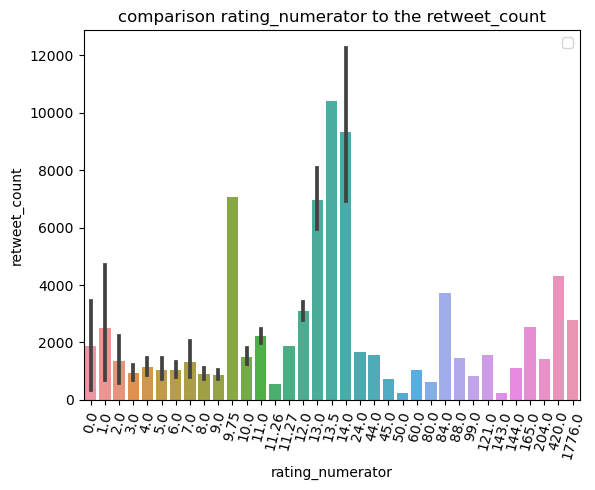

In [78]:
sns.barplot( 'rating_numerator', 'retweet_count', data = rating_final)
plt.title('comparison rating_numerator to the retweet_count')
plt.xticks(rotation=75)
plt.legend();

The above visualization shows that the rating of dogs has the highest retweet when the rating is between 11 to  14